In [64]:
library(tidyverse)
library("ggplot2")
library("dplyr")
library("reshape2")
library("knitr")
library(e1071)
library(mosaic)

dfSC = read.csv("CumulativeCases.csv", header = T)
dfSD = read.csv("TotalDeaths.csv", header = T)
dfCC = read.csv("CumulCases2020.csv")
dfCD = read.csv("TotalDeaths2020.csv")

dfW = read.csv("WHOselect.csv", header = T)

cumulSC = read.csv("Cumulative.csv")
totDLD = read.csv("TotalDeathsLD.csv")

dfC3 = read.csv("CulumNon-Interpolated2003.csv", header = T)
dfD3 = read.csv("DeathNon-Interpolated2003.csv", header = T)
dfR3 = read.csv("RecoveredNon-Interpolated2003.csv", header = T)

In [2]:
sapply(cumulSC, class)

X    Canada.2003   Germany.2003     Italy.2003 Singapore.2003 
      "factor"      "integer"      "integer"      "integer"      "integer" 
       US.2003   Vietnam.2003     China.2003    Canada.2020     China.2020 
     "integer"      "integer"      "integer"      "integer"      "integer" 
  Germany.2020     Italy.2020 Singapore.2020        US.2020   Vietnam.2020 
     "integer"      "integer"      "integer"      "integer"      "integer"

Skewness:  1.614755

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,9,36.5,206,236,7084,1120.571,2631.596,7,0


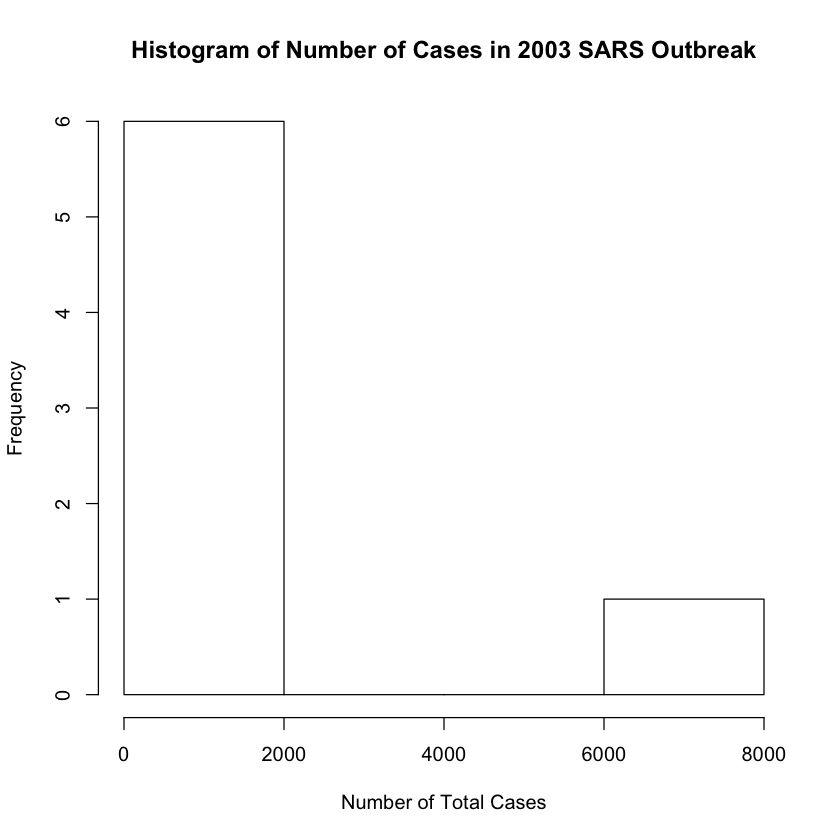

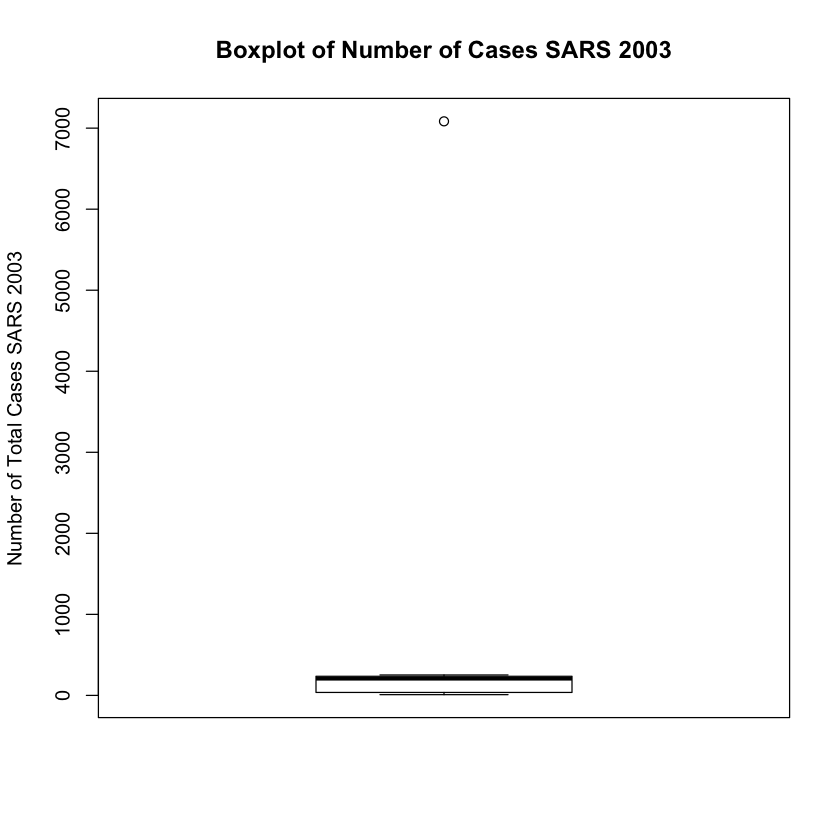

In [3]:
t2003 <- c(cumulSC$Canada.2003, cumulSC$Germany.2003, cumulSC$Italy.2003, cumulSC$Singapore.2003, cumulSC$US.2003, cumulSC$Vietnam.2003, cumulSC$China.2003)
hist(t2003, xlab ='Number of Total Cases', main = "Histogram of Number of Cases in 2003 SARS Outbreak")
skew <- skewness(t2003)
cat("Skewness: ", skew)

favstats(t2003)
boxplot(t2003, ylab = "Number of Total Cases SARS 2003", main = "Boxplot of Number of Cases SARS 2003")

China seems to be an outlier in 2003. The outlier is removed in order to see how the distribution changes. 

Skewness:  -0.02329566

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,9,23.25,134.5,216.5,252,126.6667,111.5557,6,0


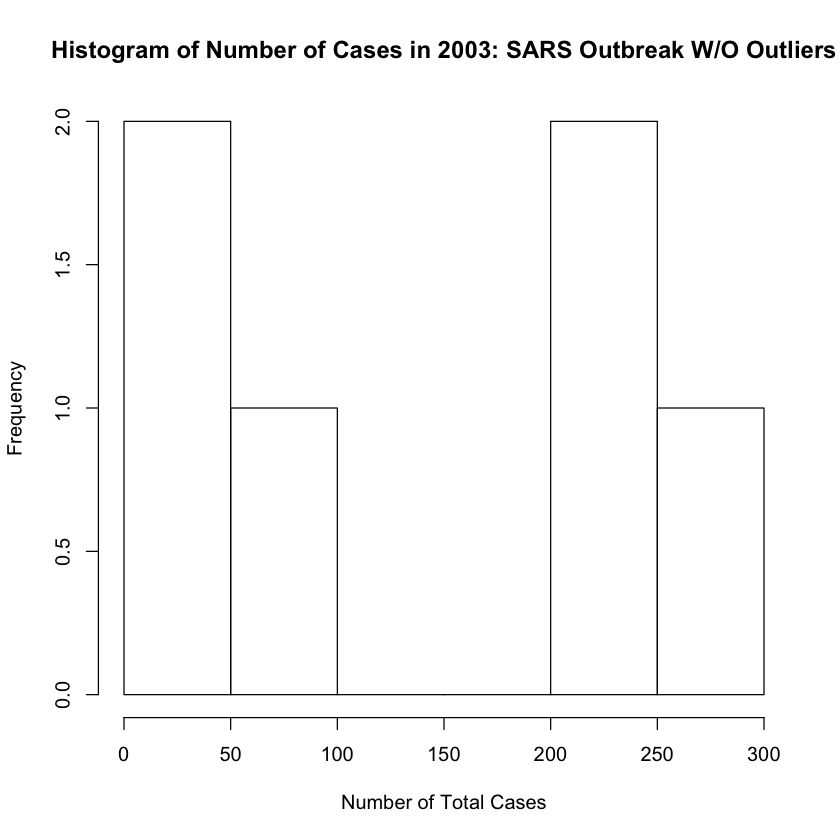

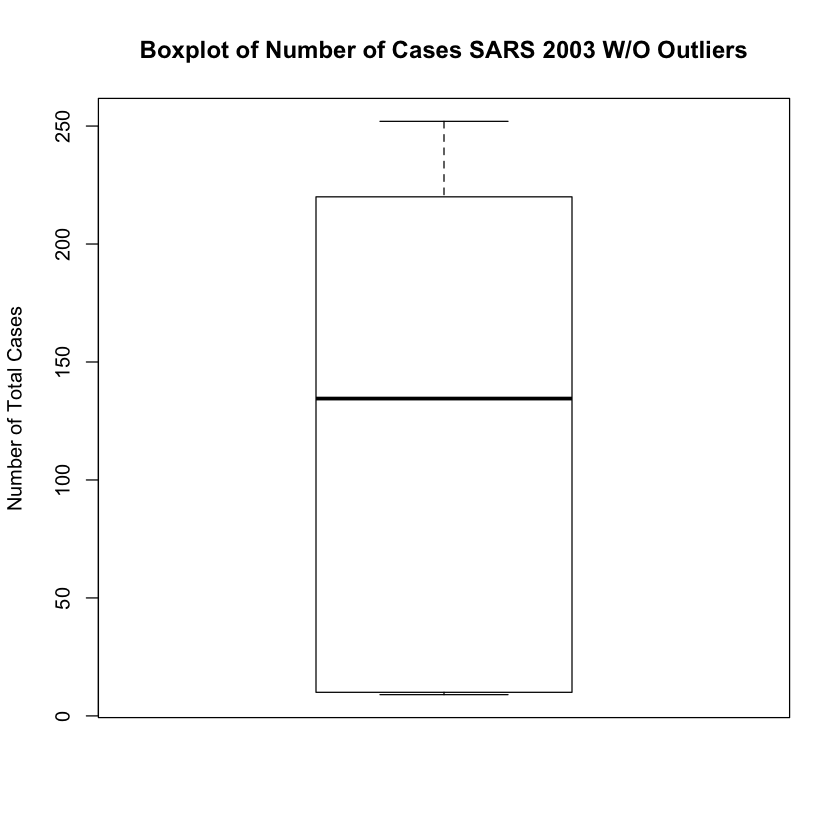

In [4]:
t2003_2 = c(cumulSC$Canada.2003, cumulSC$Germany.2003, cumulSC$Italy.2003, cumulSC$Singapore.2003, cumulSC$US.2003, cumulSC$Vietnam.2003)
hist(t2003_2, xlab ='Number of Total Cases', main = "Histogram of Number of Cases in 2003: SARS Outbreak W/O Outliers")
skew <- skewness(t2003_2)
cat("Skewness: ", skew)

favstats(t2003_2)
boxplot(t2003_2, ylab = "Number of Total Cases", main = "Boxplot of Number of Cases SARS 2003 W/O Outliers")

The skew decreased almost completely. The distribution is almost completely normal. 

Skewness:  0.2142627

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,188,3562,62095,89905.5,140886,55729.14,55214.49,7,0


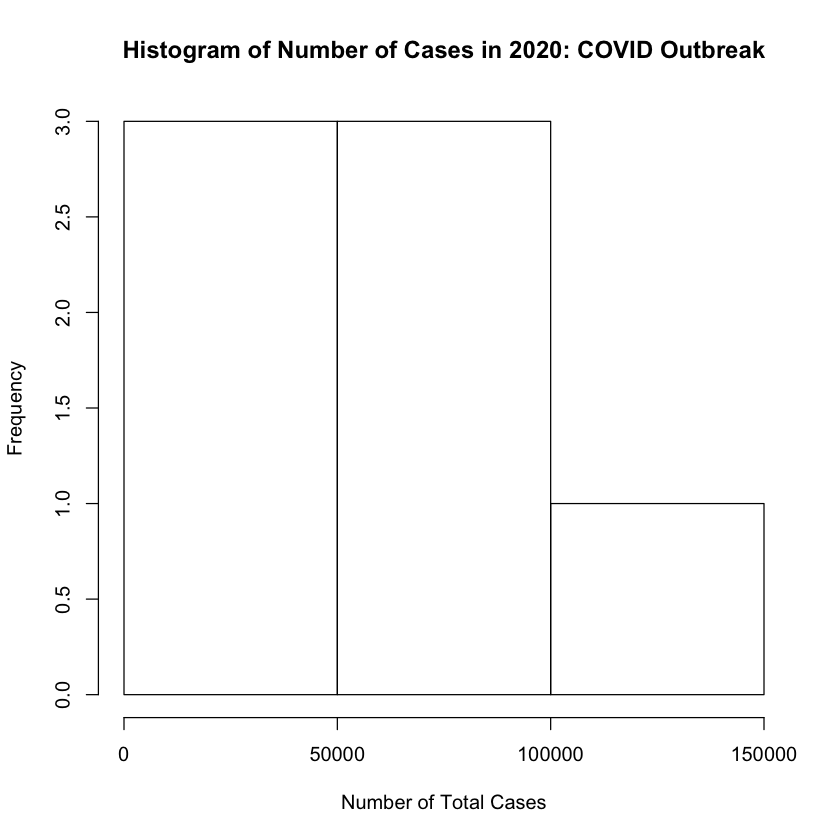

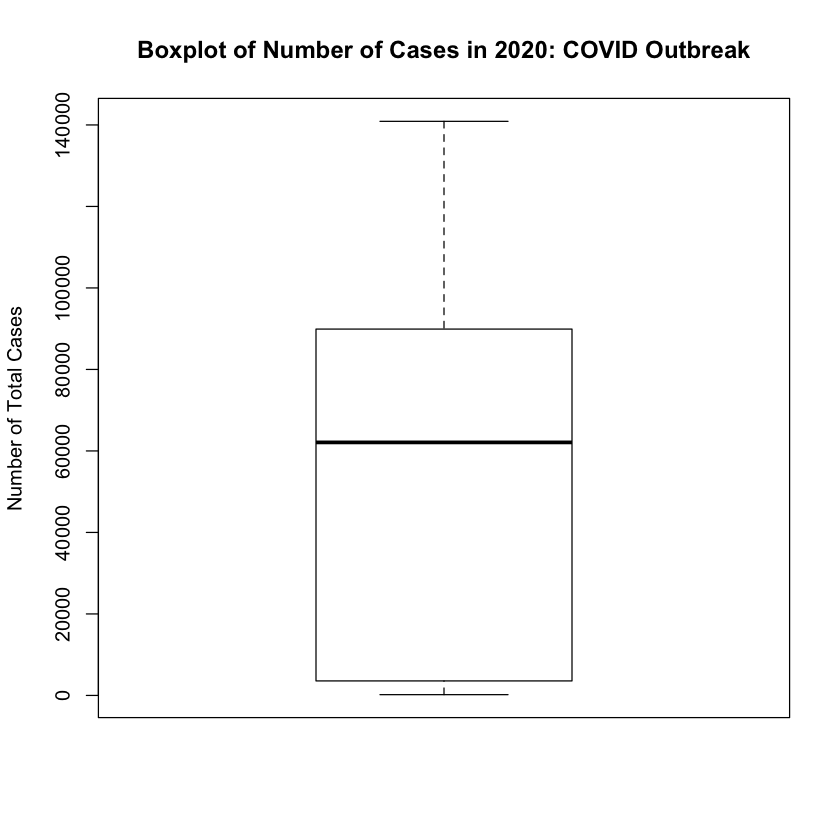

In [5]:
t2020 <- c(cumulSC$Canada.2020, cumulSC$Germany.2020, cumulSC$Italy.2020, cumulSC$Singapore.2020, cumulSC$US.2020, cumulSC$Vietnam.2020, cumulSC$China.2020)
hist(t2020, xlab ='Number of Total Cases', main = "Histogram of Number of Cases in 2020: COVID Outbreak")
skew <- skewness(t2020)
cat("Skewness: ", skew)

favstats(t2020)
boxplot(t2020, ylab = "Number of Total Cases", main = "Boxplot of Number of Cases in 2020: COVID Outbreak")

Distribution is positively skewed. The distribution is not normal. 

Skewness:  1.60474

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,0,0,5,35,646,103,239.9812,7,0


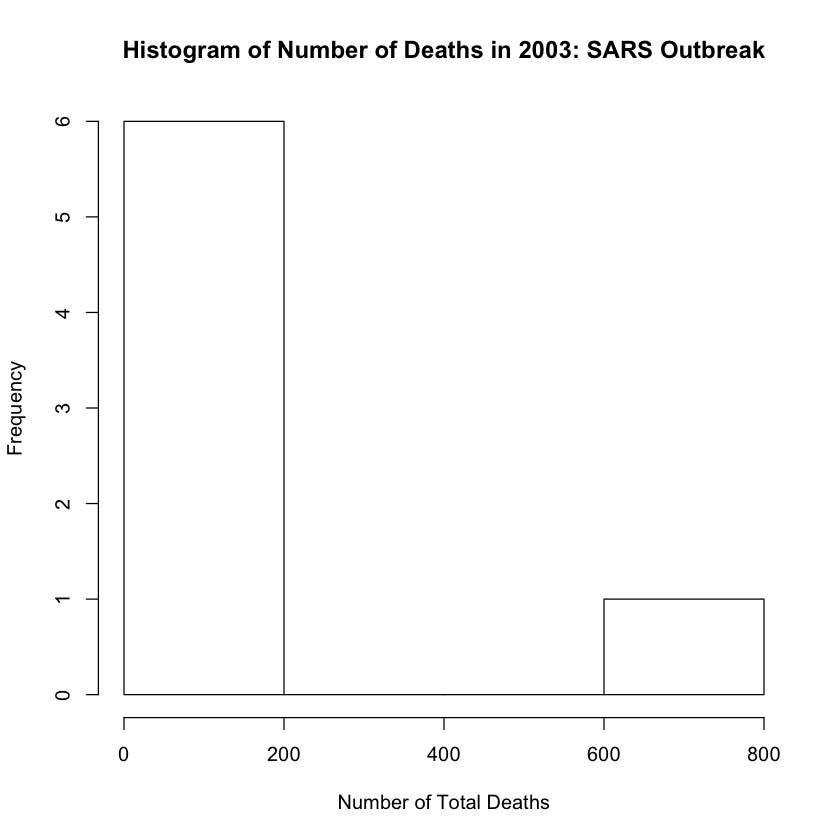

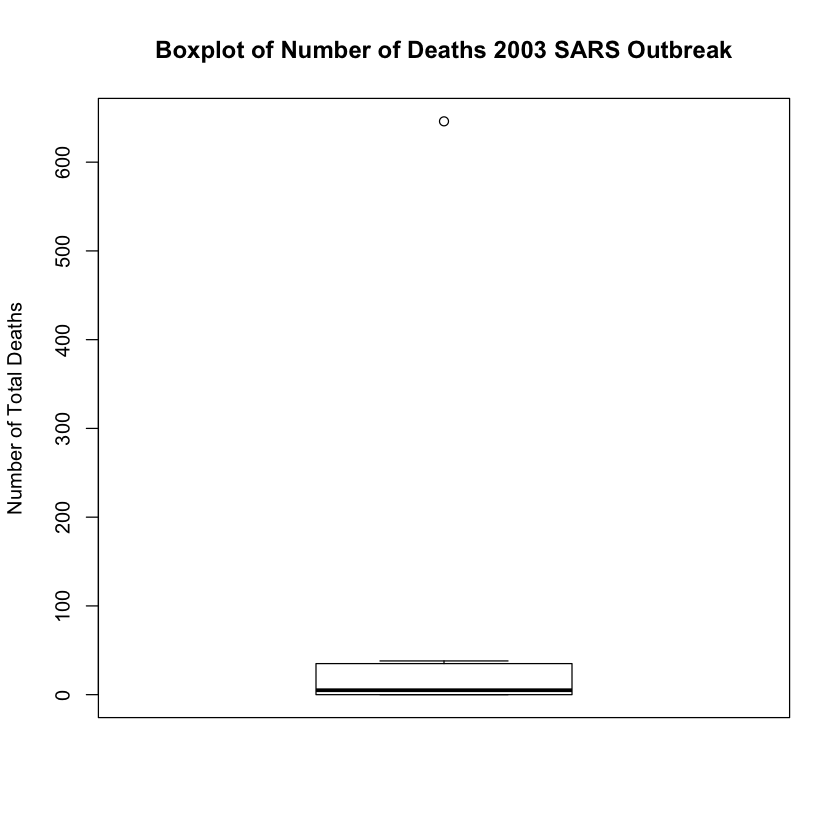

In [6]:
d2003 = c(totDLD$Canada.2003, totDLD$Germany.2003, totDLD$Italy.2003, totDLD$Singapore.2003, totDLD$US.2003, totDLD$Vietnam.2003, totDLD$China.2003)
hist(d2003, xlab ='Number of Total Deaths', main = "Histogram of Number of Deaths in 2003: SARS Outbreak")
skew <- skewness(d2003)
cat("Skewness: ", skew)

favstats(d2003)
boxplot(d2003, ylab = "Number of Total Deaths", main = "Boxplot of Number of Deaths 2003 SARS Outbreak")

China is an outlier. The skew is large and the distribution is not normal. 

Skewness:  0.5380714

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,0,0,2.5,25.25,38,12.5,17.63803,6,0


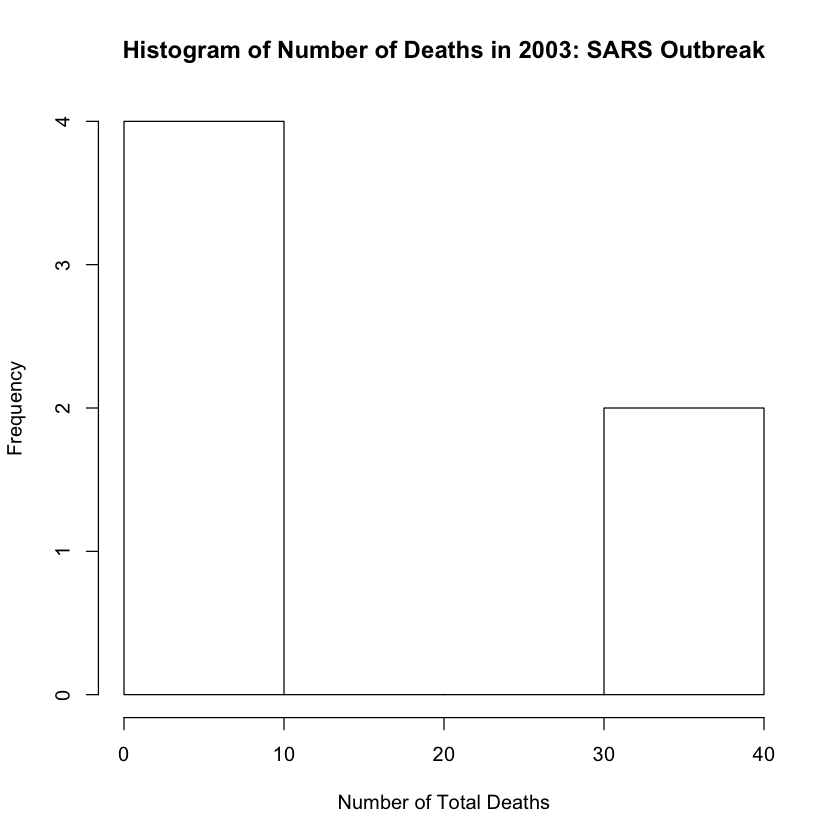

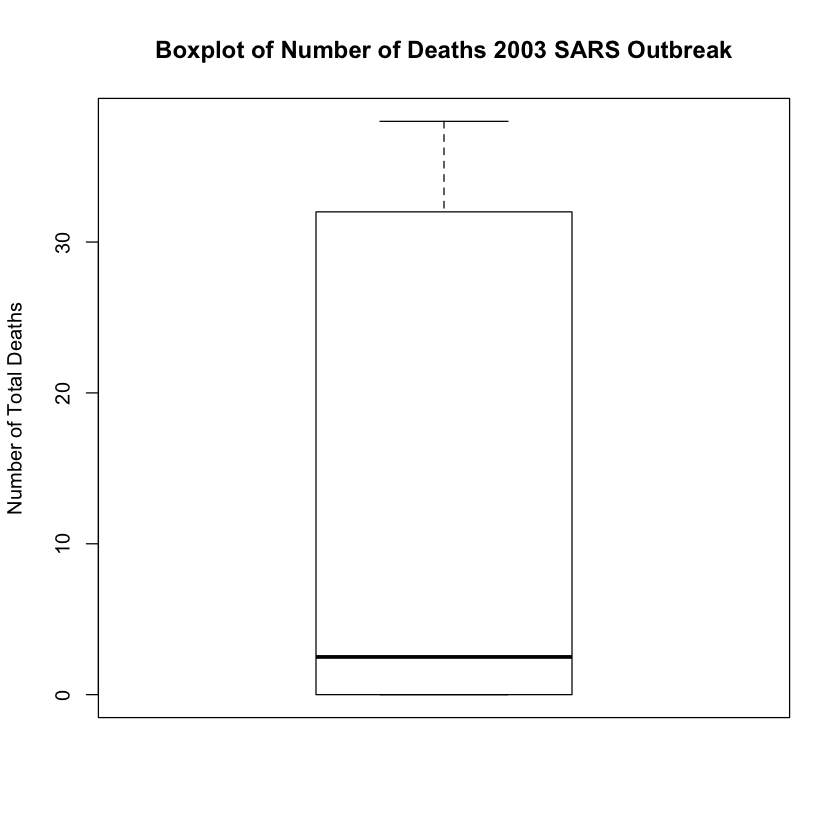

In [7]:
d2003 = c(totDLD$Canada.2003, totDLD$Germany.2003, totDLD$Italy.2003, totDLD$Singapore.2003, totDLD$US.2003, totDLD$Vietnam.2003)
hist(d2003, xlab ='Number of Total Deaths', main = "Histogram of Number of Deaths in 2003: SARS Outbreak")
skew <- skewness(d2003)
cat("Skewness: ", skew)

favstats(d2003)
boxplot(d2003, ylab = "Number of Total Deaths", main = "Boxplot of Number of Deaths 2003 SARS Outbreak")

The Deaths are still positively skewed. However, the removal of China significantly improved the skewness of the data. 

Skewness:  1.268456

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,0,33.5,533,2885.5,10779,2450,3904.272,7,0


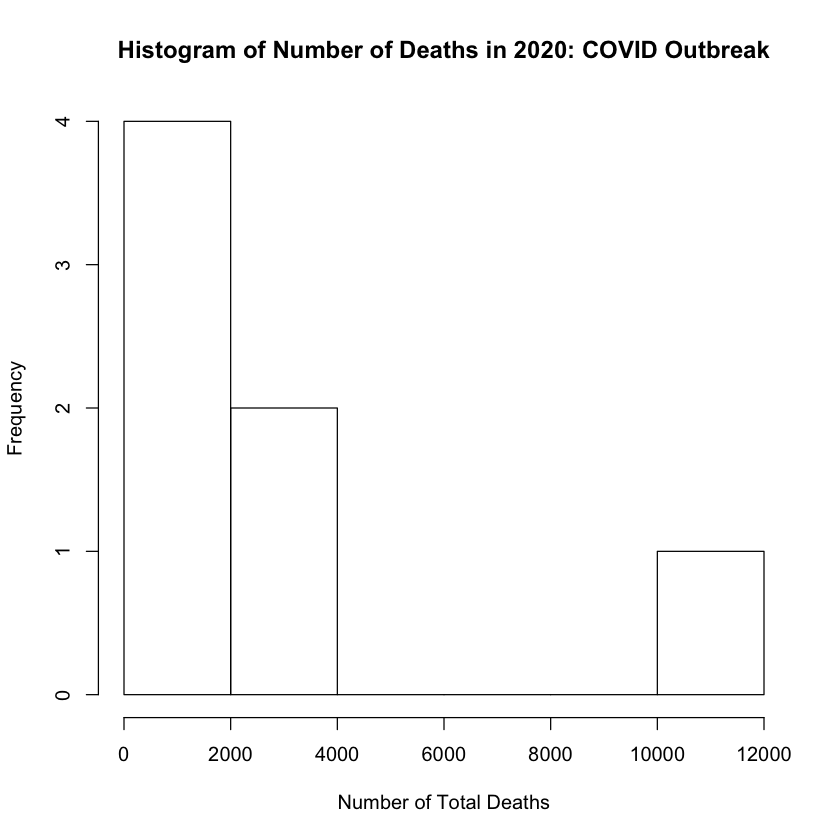

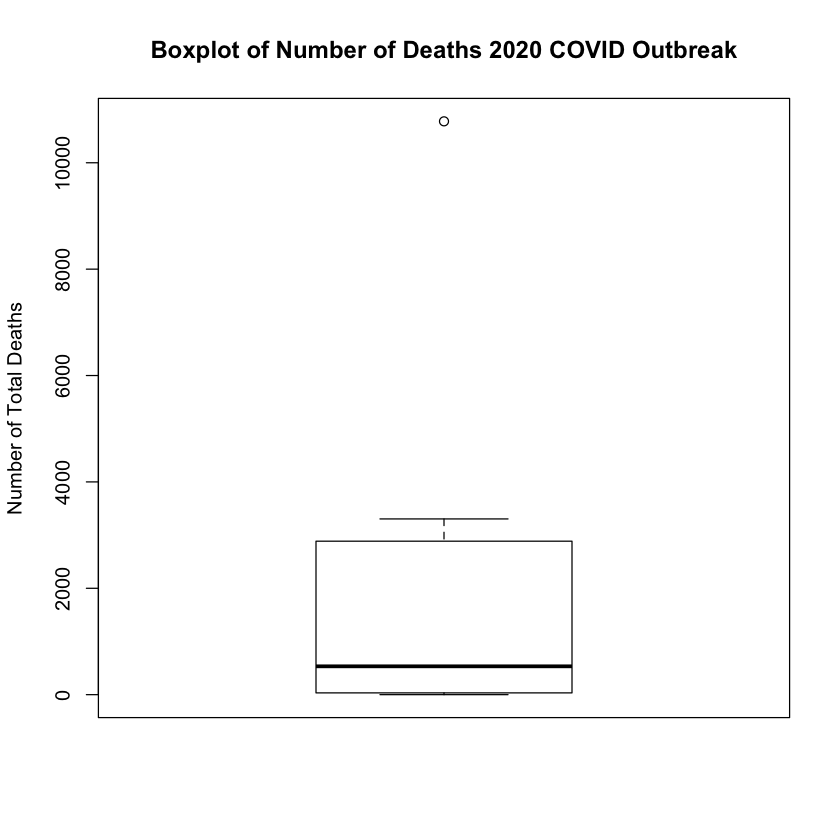

In [8]:
d2020 = c(totDLD$Canada.2020, totDLD$Germany.2020, totDLD$Italy.2020, totDLD$Singapore.2020, totDLD$US.2020, totDLD$Vietnam.2020, totDLD$China.2020)
hist(d2020, xlab ='Number of Total Deaths', main = "Histogram of Number of Deaths in 2020: COVID Outbreak")
skew <- skewness(d2020)
cat("Skewness: ", skew)

favstats(d2020)
boxplot(d2020, ylab = "Number of Total Deaths", main = "Boxplot of Number of Deaths 2020 COVID Outbreak")

Italy is an outlier. The data is positively skewed. 

Skewness:  0.5740831

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,0,18.25,298.5,1983.5,3304,1061.833,1450.914,6,0


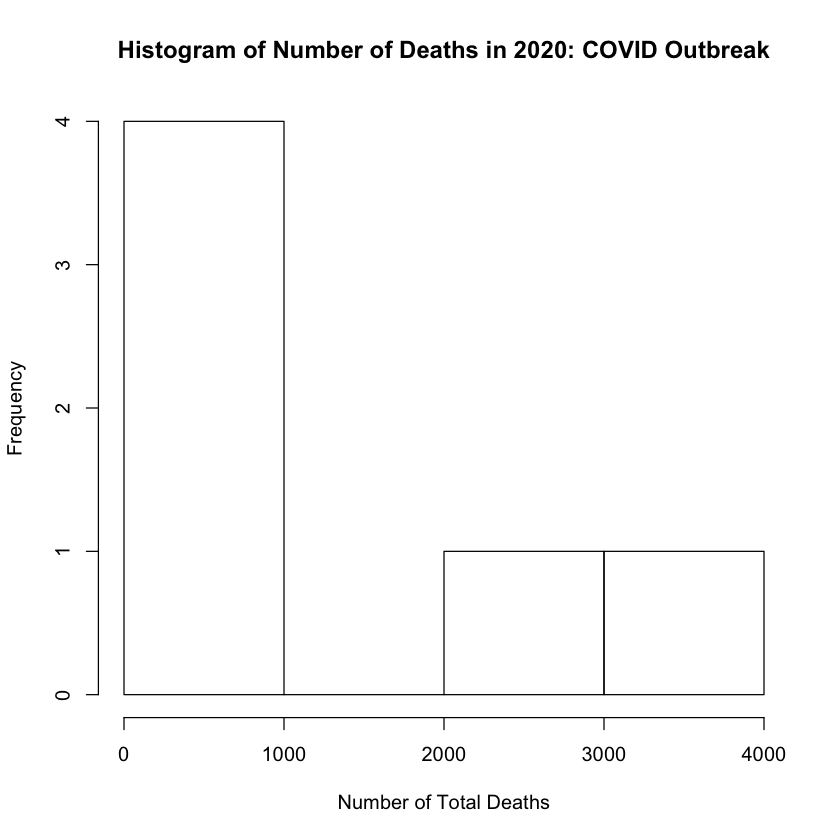

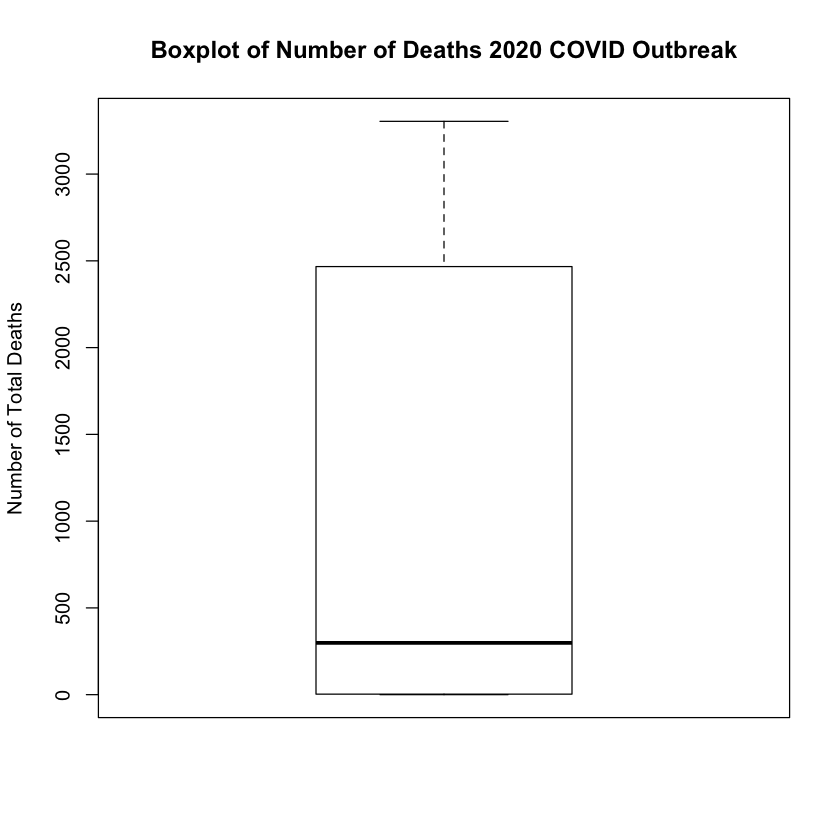

In [9]:
d2020 = c(totDLD$Canada.2020, totDLD$Germany.2020, totDLD$Singapore.2020, totDLD$US.2020, totDLD$Vietnam.2020, totDLD$China.2020)
hist(d2020, xlab ='Number of Total Deaths', main = "Histogram of Number of Deaths in 2020: COVID Outbreak")
skew <- skewness(d2020)
cat("Skewness: ", skew)

favstats(d2020)
boxplot(d2020, ylab = "Number of Total Deaths", main = "Boxplot of Number of Deaths 2020 COVID Outbreak")

Wiht the removal of Italy, the data is less skewed but still not normal. 

In [ ]:
str(totDLD)

In [ ]:
library(lattice)
histogram(~totDLD|factor(),
         data = totDLD,
         layout = c(1,7),
         nint = 30,
         xlab = "Weight in grams",
         strip = FALSE,
         strip.left = TRUE,
         ylab = "Frequencies")

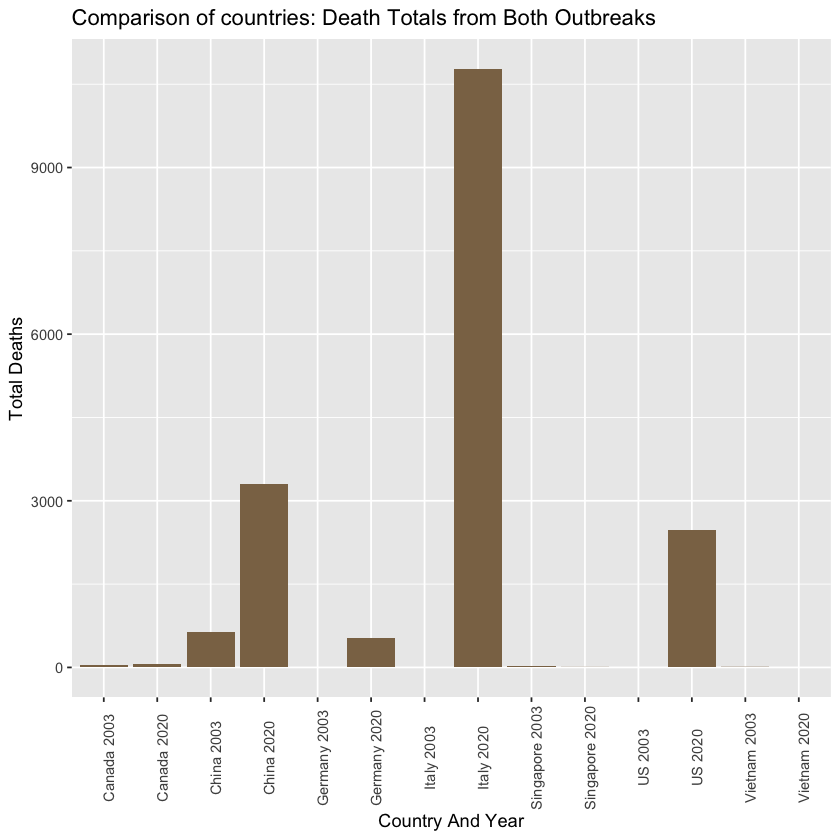

In [10]:
library(ggplot2)

data <- data.frame(CountryYear= c("Canada 2020", "Canada 2003", "Germany 2020", "Germany 2003", "Italy 2020", 
                                  "Italy 2003", "Singapore 2020", "Singapore 2003", "US 2020", "US 2003", 
                                  "Vietnam 2020", "Vietnam 2003", "China 2020", "China 2003"),  
                   Total=c(totDLD$Canada.2020, totDLD$Canada.2003, totDLD$Germany.2020, totDLD$Germany.2003,
                          totDLD$Italy.2020, totDLD$Italy.2003, totDLD$Singapore.2020, totDLD$Singapore.2003,
                          totDLD$US.2020, totDLD$US.2003, totDLD$Vietnam.2020, totDLD$Vietnam.2003,
                          totDLD$China.2020, totDLD$China.2003))

barplot <- ggplot(data, aes(x=CountryYear, y=Total)) + geom_bar(stat = "identity", fill = 'burlywood4') + 
                    ggtitle("Comparison of countries: Death Totals from Both Outbreaks") + xlab("Country And Year") + ylab("Total Deaths") +
                    theme(axis.text.x = element_text(angle = 90))
barplot

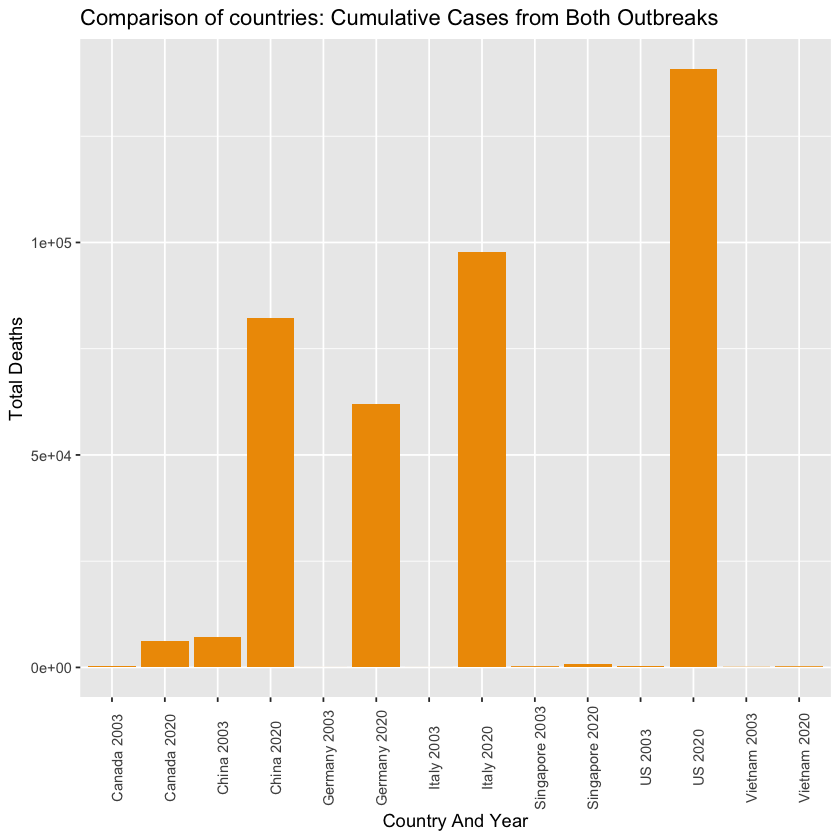

In [11]:
data <- data.frame(CountryYear= c("Canada 2020", "Canada 2003", "Germany 2020", "Germany 2003", "Italy 2020", 
                                  "Italy 2003", "Singapore 2020", "Singapore 2003", "US 2020", "US 2003", 
                                  "Vietnam 2020", "Vietnam 2003", "China 2020", "China 2003"),  
                   Total=c(cumulSC$Canada.2020, cumulSC$Canada.2003, cumulSC$Germany.2020, cumulSC$Germany.2003,
                          cumulSC$Italy.2020, cumulSC$Italy.2003, cumulSC$Singapore.2020, cumulSC$Singapore.2003,
                          cumulSC$US.2020, cumulSC$US.2003, cumulSC$Vietnam.2020, cumulSC$Vietnam.2003,
                          cumulSC$China.2020, cumulSC$China.2003))

barplot <- ggplot(data, aes(x=CountryYear, y=Total)) + geom_bar(stat = "identity", fill = 'orange2') + 
                    ggtitle("Comparison of countries: Cumulative Cases from Both Outbreaks") + xlab("Country And Year") + ylab("Total Deaths") +
                    theme(axis.text.x = element_text(angle = 90))
barplot

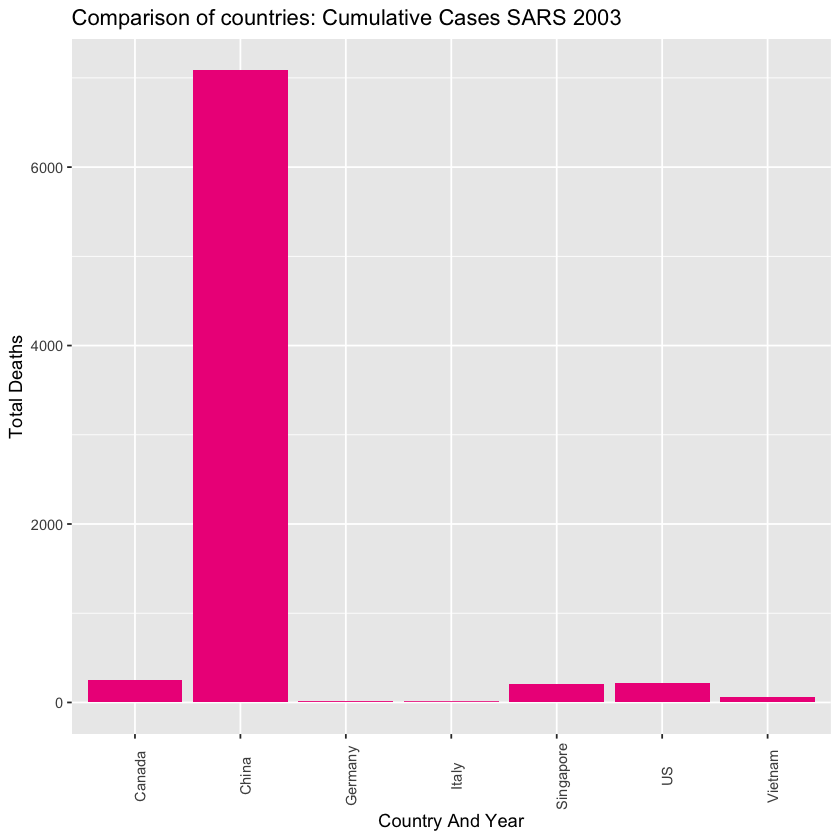

In [12]:
data <- data.frame(CountryYear= c("Canada", "Germany", "Italy", "Singapore", "US", "Vietnam", "China"),  
                   Total=c(cumulSC$Canada.2003, cumulSC$Germany.2003, cumulSC$Italy.2003, cumulSC$Singapore.2003,
                        cumulSC$US.2003, cumulSC$Vietnam.2003, cumulSC$China.2003))

barplot <- ggplot(data, aes(x=CountryYear, y=Total)) + geom_bar(stat = "identity", fill = 'deeppink2') + 
                    ggtitle("Comparison of countries: Cumulative Cases SARS 2003") + xlab("Country And Year") + ylab("Total Deaths") +
                    theme(axis.text.x = element_text(angle = 90))
barplot

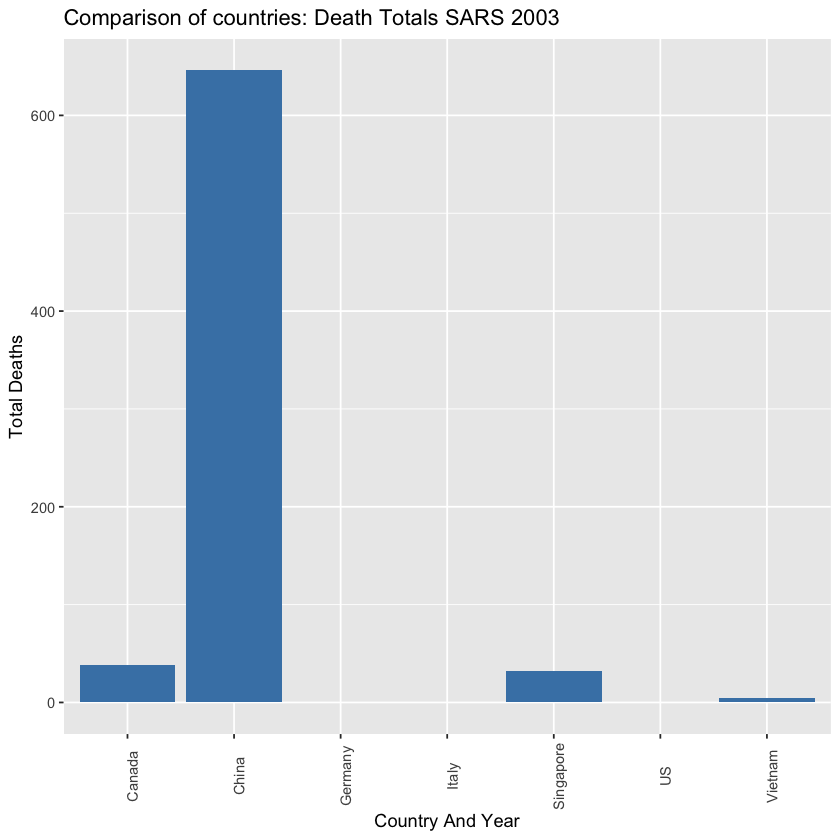

In [13]:
library(ggplot2)

data <- data.frame(CountryYear= c("Canada", "Germany", "Italy", "Singapore", "US", "Vietnam", "China"),  
                   Total=c(totDLD$Canada.2003, totDLD$Germany.2003, totDLD$Italy.2003, totDLD$Singapore.2003,
                           totDLD$US.2003, totDLD$Vietnam.2003, totDLD$China.2003))

barplot <- ggplot(data, aes(x=CountryYear, y=Total)) + geom_bar(stat = "identity", fill="steelblue") + 
                    ggtitle("Comparison of countries: Death Totals SARS 2003") + xlab("Country And Year") + ylab("Total Deaths") +
                    theme(axis.text.x = element_text(angle = 90))
barplot

In [14]:
library(pwr)
library(distr)

Loading required package: startupmsg

Utilities for Start-Up Messages (version 0.9.6)

For more information see ?"startupmsg", NEWS("startupmsg")


Loading required package: sfsmisc


Attaching package: ‘sfsmisc’


The following object is masked from ‘package:mosaic’:

    factorize


The following object is masked from ‘package:dplyr’:

    last


Object Oriented Implementation of Distributions (version 2.8.0)

Attention: Arithmetics on distribution objects are understood as operations on corresponding random variables (r.v.s); see distrARITH().
Some functions from package 'stats' are intentionally masked ---see distrMASK().
Note that global options are controlled by distroptions() ---c.f. ?"distroptions".

For more information see ?"distr", NEWS("distr"), as well as
  http://distr.r-forge.r-project.org/
Package "distrDoc" provides a vignette to this package as well as to several extension packages; try vignette("distr").



Attaching package: ‘distr’


The following object is masked 

In [15]:
pwr.t.test(n = 96, d = 0.5, sig.level = 0.05, alternative = "greater")


     Two-sample t test power calculation 

              n = 96
              d = 0.5
      sig.level = 0.05
          power = 0.9646091
    alternative = greater

NOTE: n is number in *each* group


The t tests comparing the death totals, in selected countries, from the 2003 SARS Outbreak will have 96.4% power. 

In [16]:
pwr.t.test(d=0.5, sig.level = 0.05, power = 0.8, alternative = "greater")


     Two-sample t test power calculation 

              n = 50.1508
              d = 0.5
      sig.level = 0.05
          power = 0.8
    alternative = greater

NOTE: n is number in *each* group


50 days of SARS data need to be collected in each country to have 0.8 power. 

In [17]:
ttest = t.test(dfSD$China, dfSD$Canada, alternative = "greater", paired = FALSE)
ttest


	Welch Two Sample t-test

data:  dfSD$China and dfSD$Canada
t = 14.221, df = 95.427, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 318.7531      Inf
sample estimates:
mean of x mean of y 
381.89583  20.98958 


Null hypothesis: There is no difference in the mean deaths per day between the two countries. 
Alternative hypothesis: This is a difference in the mean deaths per day between the two countries.

China will recieve the most severe classification. The t-test indicates that China has significantly more mean deaths per day than the country with the second highest mean deaths per day (Canada). The 95% confidence interval does not contain the value 0 and the p-value is below 0.05. Therefore, this conclusion is valid. 

Reject the null hypothesis for the t-test between China and Canada. 

In [18]:
ttest = t.test(dfSD$Canada, dfSD$Singapore, alternative = "greater", paired = FALSE)
ttest


	Welch Two Sample t-test

data:  dfSD$Canada and dfSD$Singapore
t = -0.22785, df = 189.98, p-value = 0.59
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -3.181406       Inf
sample estimates:
mean of x mean of y 
 20.98958  21.37500 


Null hypothesis: There is no difference in the mean deaths per day between the two countries. 
Alternative hypothesis: This is a difference in the mean deaths per day between the two countries.

Canada and Singapore will be placed in the second most severe classification. The t-test indicates that there is no significant difference between the mean deaths per day of the two countries. The 95% confidence interval contains the value 0 and the p-value is above 0.05. Therefore, this conclusion is valid.

Fail to reject the null hypothesis for the t-test between Singapore and Canada.

In [19]:
ttest = t.test(dfSD$Singapore, dfSD$Vietnam, alternative = "greater", paired = FALSE)
ttest


	Welch Two Sample t-test

data:  dfSD$Singapore and dfSD$Vietnam
t = 14.056, df = 96.044, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 14.78915      Inf
sample estimates:
mean of x mean of y 
21.375000  4.604167 


Null hypothesis: There is no difference in the mean deaths per day between the two countries. 
Alternative hypothesis: This is a difference in the mean deaths per day between the two countries.

Vietnam will be placed in the third most severe classification. The t-test indicates that there is a significant difference in the mean deaths per day between Vietnam and Singapore. The 95% confidence interval does not contain the value 0 and the p-value is below 0.05. Therefore, this conclusion is valid.
Singapore has a lower death total than Canada. Therefore, it can be assumed that Vietnam's mean deaths per day will have a significant difference from Canada's mean deaths per day. 

Reject the null hypothesis for the t-test between Singapore and Vietnam. 

In [20]:
ttest = t.test(dfSD$Vietnam, dfSD$United.States, alternative = "greater", paired = FALSE)
ttest


	Welch Two Sample t-test

data:  dfSD$Vietnam and dfSD$United.States
t = 52.197, df = 95, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 4.45765     Inf
sample estimates:
mean of x mean of y 
 4.604167  0.000000 


Null hypothesis: There is no difference in the mean deaths per day between the two countries. 
Alternative hypothesis: This is a difference in the mean deaths per day between the two countries.

United States will be placed in the fourth most severe classification. The t-test indicates that there is a significant difference in the mean deaths per day between Vietnam and the United States. The 95% confidence interval does not contain the value 0 and the p-value is below 0.05. Therefore, this conclusion is valid.

Reject the null hypothesis for the t-test between Vietnam and United States. 

In [21]:
ttest = t.test(dfSD$United.States, dfSD$Germany, alternative = "greater", paired = FALSE)
ttest


	Welch Two Sample t-test

data:  dfSD$United.States and dfSD$Germany
t = NaN, df = NaN, p-value = NA
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 NaN NaN
sample estimates:
mean of x mean of y 
        0         0 


Null hypothesis: There is no difference in the mean deaths per day between the two countries. 
Alternative hypothesis: This is a difference in the mean deaths per day between the two countries.

Fail to reject the null hypothesis for the t-test between Germany and United States.

Germany, Italy, and United States did not experience a death during the outbreak. They will be placed in the fourth classification. The t-test does not have anything to compare. 

In [22]:
dfW$classification <- c(2,1,4,4,2,4,3)
dfW

Member.State,Total.population,Annual.Growth.Rate.....1992.2002,Dependency.ratio.1992,Dependency.ratio.2002,Percentage.of.population.aged.60...1992.,Percentage.of.population.aged.60.,Total.Fertility.Rate.1992,Total.Fertility.Rate.2002,LIFE.EXPECTANCY.AT.BIRTH.BOTH.SEXES.2002,⋯,PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002,PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002.Upper.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002.Lower.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.AGE.15.59.MALES.2002,PROBABILITY.OF.DYING.AGE.15.59.MALES.2002.Upper.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.AGE.15.59.MALES.2002.Lower.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002,PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002.Upper.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002.Lower.Bound.Uncertainty.Interval..per.1000.,classification
<fct>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
Canada,31271.069,1.0,47,45,15.8,17.1,1.7,1.5,79.8,⋯,5,5,5,95,93,97,58,57,60,2
China,1302307.069,0.9,49,44,8.6,10.0,2.0,1.8,71.1,⋯,41,38,44,165,154,175,104,93,112,1
Germany,82414.408,0.2,46,48,20.5,24.0,1.3,1.3,78.7,⋯,4,4,4,118,114,123,60,59,62,4
Italy,57482.385,0.1,45,49,21.7,24.5,1.3,1.2,79.7,⋯,5,4,5,96,92,100,49,46,51,4
Singapore,4183.273,2.8,38,40,8.7,11.1,1.8,1.4,79.6,⋯,3,3,3,90,80,101,53,49,56,2
United States of America,291037.954,1.1,52,51,16.4,16.2,2.0,2.1,77.3,⋯,7,7,7,140,134,148,83,81,84,4
Vietnam,80278.208,1.5,76,59,7.3,7.4,3.4,2.3,69.6,⋯,33,28,37,200,184,215,129,117,140,3


In [23]:
library(magrittr)


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract




In [24]:
dfW %<>% mutate_if(is.integer,as.numeric)
dfW

Member.State,Total.population,Annual.Growth.Rate.....1992.2002,Dependency.ratio.1992,Dependency.ratio.2002,Percentage.of.population.aged.60...1992.,Percentage.of.population.aged.60.,Total.Fertility.Rate.1992,Total.Fertility.Rate.2002,LIFE.EXPECTANCY.AT.BIRTH.BOTH.SEXES.2002,⋯,PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002,PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002.Upper.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002.Lower.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.AGE.15.59.MALES.2002,PROBABILITY.OF.DYING.AGE.15.59.MALES.2002.Upper.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.AGE.15.59.MALES.2002.Lower.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002,PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002.Upper.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002.Lower.Bound.Uncertainty.Interval..per.1000.,classification
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Canada,31271.069,1.0,47,45,15.8,17.1,1.7,1.5,79.8,⋯,5,5,5,95,93,97,58,57,60,2
China,1302307.069,0.9,49,44,8.6,10.0,2.0,1.8,71.1,⋯,41,38,44,165,154,175,104,93,112,1
Germany,82414.408,0.2,46,48,20.5,24.0,1.3,1.3,78.7,⋯,4,4,4,118,114,123,60,59,62,4
Italy,57482.385,0.1,45,49,21.7,24.5,1.3,1.2,79.7,⋯,5,4,5,96,92,100,49,46,51,4
Singapore,4183.273,2.8,38,40,8.7,11.1,1.8,1.4,79.6,⋯,3,3,3,90,80,101,53,49,56,2
United States of America,291037.954,1.1,52,51,16.4,16.2,2.0,2.1,77.3,⋯,7,7,7,140,134,148,83,81,84,4
Vietnam,80278.208,1.5,76,59,7.3,7.4,3.4,2.3,69.6,⋯,33,28,37,200,184,215,129,117,140,3


In [25]:
write.csv(dfW,"dfW.csv", row.names = TRUE)

In [26]:
dfW = read.csv("dfW.csv", header = T)

In [27]:
library(caret)
library(randomForest)
library(varImp)
library(naivebayes)


Attaching package: ‘caret’


The following object is masked from ‘package:mosaic’:

    dotPlot


The following object is masked from ‘package:purrr’:

    lift


randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin


Loading required package: measures


Attaching package: ‘measures’


The following objects are masked from ‘package:caret’:

    MAE, RMSE


Loading required package: party

Loading required package: grid

Loading required package: mvtnorm

Loading required package: modeltools

Loading required package: stats4


Attaching package: ‘modeltools’


The following object is masked from ‘package:distr’:

    dimension


Loading required package: strucchange

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.

In [28]:
sapply(dfW, class)

X 
                                                                                   "integer" 
                                                                                Member.State 
                                                                                    "factor" 
                                                                            Total.population 
                                                                                   "numeric" 
                                                            Annual.Growth.Rate.....1992.2002 
                                                                                   "numeric" 
                                                                       Dependency.ratio.1992 
                                                                                   "integer" 
                                                                       Dependency.ratio.2002 
                                                                                   "integer" 
                                                    Percentage.of.population.aged.60...1992. 
                                                                                   "numeric" 
                                                           Percentage.of.population.aged.60. 
                                                                                   "numeric" 
                                                                   Total.Fertility.Rate.1992 
                                                                                   "numeric" 
                                                                   Total.Fertility.Rate.2002 
                                                                                   "numeric" 
                                                    LIFE.EXPECTANCY.AT.BIRTH.BOTH.SEXES.2002 
                                                                                   "numeric" 
                                                 LIFE.EXPECTANCY.AT.BIRTH.MALES.2002..years. 
                                                                                   "numeric" 
                LIFE.EXPECTANCY.AT.BIRTH.MALES.2002..years..Lower.Bound.Uncertainty.Interval 
                                                                                   "numeric" 
                LIFE.EXPECTANCY.AT.BIRTH.MALES.2002..years..Upper.Bound.Uncertainty.Interval 
                                                                                   "numeric" 
                                               LIFE.EXPECTANCY.AT.BIRTH.FEMALES.2002..years. 
                                                                                   "numeric" 
              LIFE.EXPECTANCY.AT.BIRTH.FEMALES.2002..years..Lower.Bound.Uncertainty.Interval 
                                                                                   "numeric" 
              LIFE.EXPECTANCY.AT.BIRTH.FEMALES.2002..years..Upper.Bound.Uncertainty.Interval 
                                                                                   "numeric" 
                                              PROBABILITY.OF.DYING.UNDER.AGE.OF.5.MALES.2002 
                                                                                   "integer" 
  PROBABILITY.OF.DYING.UNDER.AGE.OF.5.MALES.2002.Upper.Bound.Uncertainty.Interval..per.1000. 
                                                                                   "integer" 
  PROBABILITY.OF.DYING.UNDER.AGE.OF.5.MALES.2002.Lower.Bound.Uncertainty.Interval..per.1000. 
                                                                                   "integer" 
                                            PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002 
                                                                                   "integer" 
PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002.Upper.Bound.Uncertainty.Interval..per.1000. 
                                                 

In [29]:
df <- dfW %>% filter(!Member.State == "China" & !Member.State == "Vietnam")
df$classification[df$classification<3] <- 1
df$classification[df$classification>3] <- 0

df <- df[,-1]
df
#0 means not severe
#1 means moderately severe

Member.State,Total.population,Annual.Growth.Rate.....1992.2002,Dependency.ratio.1992,Dependency.ratio.2002,Percentage.of.population.aged.60...1992.,Percentage.of.population.aged.60.,Total.Fertility.Rate.1992,Total.Fertility.Rate.2002,LIFE.EXPECTANCY.AT.BIRTH.BOTH.SEXES.2002,⋯,PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002,PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002.Upper.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002.Lower.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.AGE.15.59.MALES.2002,PROBABILITY.OF.DYING.AGE.15.59.MALES.2002.Upper.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.AGE.15.59.MALES.2002.Lower.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002,PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002.Upper.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002.Lower.Bound.Uncertainty.Interval..per.1000.,classification
<fct>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
Canada,31271.069,1.0,47,45,15.8,17.1,1.7,1.5,79.8,⋯,5,5,5,95,93,97,58,57,60,1
Germany,82414.408,0.2,46,48,20.5,24.0,1.3,1.3,78.7,⋯,4,4,4,118,114,123,60,59,62,0
Italy,57482.385,0.1,45,49,21.7,24.5,1.3,1.2,79.7,⋯,5,4,5,96,92,100,49,46,51,0
Singapore,4183.273,2.8,38,40,8.7,11.1,1.8,1.4,79.6,⋯,3,3,3,90,80,101,53,49,56,1
United States of America,291037.954,1.1,52,51,16.4,16.2,2.0,2.1,77.3,⋯,7,7,7,140,134,148,83,81,84,0


In [30]:
set.seed(998)
indxTrain <- createDataPartition(y = df$classification,p = 0.5,list = FALSE)
training <- df[indxTrain,] 
testing <- df[-indxTrain,] 

In [31]:
sapply(df, class)

Member.State 
                                                                                    "factor" 
                                                                            Total.population 
                                                                                   "numeric" 
                                                            Annual.Growth.Rate.....1992.2002 
                                                                                   "numeric" 
                                                                       Dependency.ratio.1992 
                                                                                   "integer" 
                                                                       Dependency.ratio.2002 
                                                                                   "integer" 
                                                    Percentage.of.population.aged.60...1992. 
                                                                                   "numeric" 
                                                           Percentage.of.population.aged.60. 
                                                                                   "numeric" 
                                                                   Total.Fertility.Rate.1992 
                                                                                   "numeric" 
                                                                   Total.Fertility.Rate.2002 
                                                                                   "numeric" 
                                                    LIFE.EXPECTANCY.AT.BIRTH.BOTH.SEXES.2002 
                                                                                   "numeric" 
                                                 LIFE.EXPECTANCY.AT.BIRTH.MALES.2002..years. 
                                                                                   "numeric" 
                LIFE.EXPECTANCY.AT.BIRTH.MALES.2002..years..Lower.Bound.Uncertainty.Interval 
                                                                                   "numeric" 
                LIFE.EXPECTANCY.AT.BIRTH.MALES.2002..years..Upper.Bound.Uncertainty.Interval 
                                                                                   "numeric" 
                                               LIFE.EXPECTANCY.AT.BIRTH.FEMALES.2002..years. 
                                                                                   "numeric" 
              LIFE.EXPECTANCY.AT.BIRTH.FEMALES.2002..years..Lower.Bound.Uncertainty.Interval 
                                                                                   "numeric" 
              LIFE.EXPECTANCY.AT.BIRTH.FEMALES.2002..years..Upper.Bound.Uncertainty.Interval 
                                                                                   "numeric" 
                                              PROBABILITY.OF.DYING.UNDER.AGE.OF.5.MALES.2002 
                                                                                   "integer" 
  PROBABILITY.OF.DYING.UNDER.AGE.OF.5.MALES.2002.Upper.Bound.Uncertainty.Interval..per.1000. 
                                                                                   "integer" 
  PROBABILITY.OF.DYING.UNDER.AGE.OF.5.MALES.2002.Lower.Bound.Uncertainty.Interval..per.1000. 
                                                                                   "integer" 
                                            PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002 
                                                                                   "integer" 
PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002.Upper.Bound.Uncertainty.Interval..per.1000. 
                                                                                   "integer" 
PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002.Lower.Bound.Uncertainty.Interval..per.1000. 
                                      

In [127]:
df$classification <- as.factor(df$classification)
x = training[,2:28]
y = training$classification
y = as.factor(y)
z = testing$classification
z = as.factor(z)

model = train(x,y,'glm',trControl=trainControl(method='cv',number=10))
print(model)

Predict <- predict(model,newdata = testing[,2:28])

confusionMatrix(Predict, z)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


Generalized Linear Model 

 3 samples
27 predictors
 2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 2, 2, 2 
Resampling results:

  Accuracy  Kappa
  1         NaN  



Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


ERROR: Error in confusionMatrix.default(Predict, z): the data cannot have more levels than the reference


In [126]:
levels(z)

[1] "0"

In [117]:
df$Outcome = as.factor(df$Outcome)
set.seed(998)
indxTrain <- createDataPartition(y = df$Outcome,p = 0.75,list = FALSE)
training <- df[indxTrain,] 
testing <- df[-indxTrain,] 

z = testing$Outcome
z = as.factor(z)

train.control <- trainControl(method = "cv", number = 10)
# Train the model
model <- train(Outcome ~ Glucose + BloodPressure + SkinThickness+Insulin+BMI+DiabetesPedigreeFunction+
            Age, data = training, method = "glm",
               trControl = train.control)
# Summarize the results
print(model)

Predict <- predict(model,newdata = testing)

confusionMatrix(Predict, z)

ERROR: Error in `$<-.data.frame`(`*tmp*`, Outcome, value = structure(integer(0), .Label = character(0), class = "factor")): replacement has 0 rows, data has 5


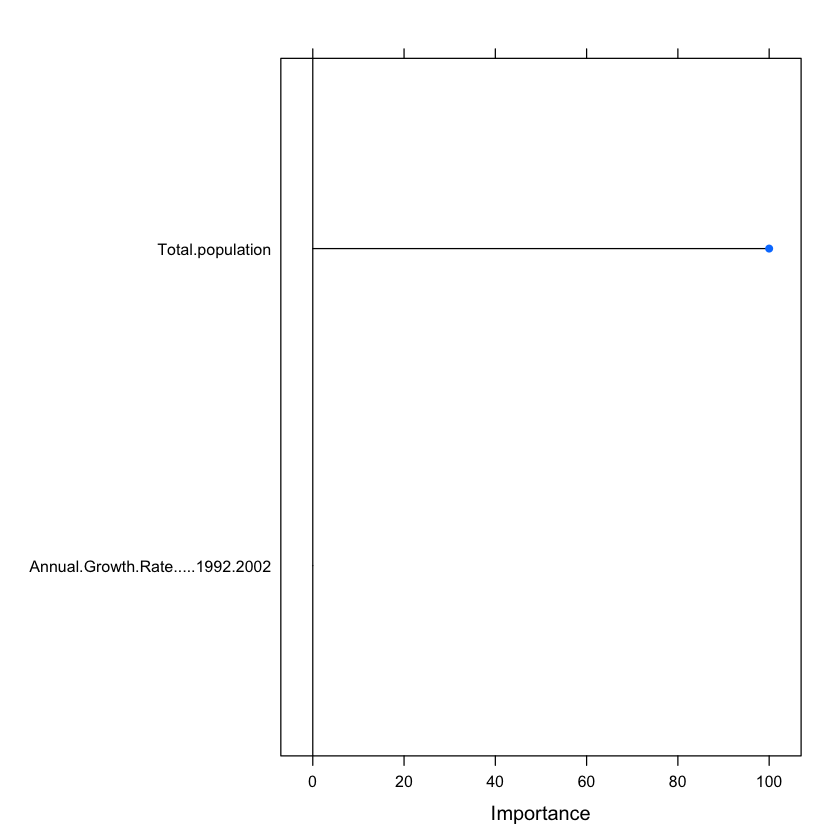

In [33]:
X <- caret::varImp(model)
plot(X)

In [70]:
dfSC = read.csv("CumulativeCases.csv", header = T)

In [190]:
dfSC$China[1]

[1] 95

In [110]:
class(dfSC$Date)
dfSC$Date <- as.character(dfSC$Date)
dfSC$Date <- as.POSIXct(dfSC$Date)

[1] "POSIXct" "POSIXt"

 [1] "2003-03-17 MST" "2003-03-18 MST" "2003-03-19 MST" "2003-03-20 MST"
 [5] "2003-03-21 MST" "2003-03-22 MST" "2003-03-24 MST" "2003-03-25 MST"
 [9] "2003-03-26 MST" "2003-03-27 MST" "2003-03-28 MST" "2003-03-29 MST"
[13] "2003-03-31 MST" "2003-04-01 MST" "2003-04-02 MST" "2003-04-03 MST"
[17] "2003-04-04 MST" "2003-04-05 MST" "2003-04-07 MDT" "2003-04-08 MDT"
[21] "2003-04-09 MDT" "2003-04-10 MDT" "2003-04-11 MDT" "2003-04-12 MDT"
[25] "2003-04-14 MDT" "2003-04-15 MDT" "2003-04-16 MDT" "2003-04-17 MDT"
[29] "2003-04-18 MDT" "2003-04-19 MDT" "2003-04-21 MDT" "2003-04-22 MDT"
[33] "2003-04-23 MDT" "2003-04-24 MDT" "2003-04-25 MDT" "2003-04-26 MDT"
[37] "2003-04-28 MDT" "2003-04-29 MDT" "2003-04-30 MDT" "2003-05-01 MDT"
[41] "2003-05-02 MDT" "2003-05-03 MDT" "2003-05-05 MDT" "2003-05-06 MDT"
[45] "2003-05-07 MDT" "2003-05-08 MDT" "2003-05-09 MDT" "2003-05-10 MDT"
[49] "2003-05-12 MDT" "2003-05-13 MDT" "2003-05-14 MDT" "2003-05-15 MDT"
[53] "2003-05-16 MDT" "2003-05-17 MDT" "2003-05-19 

`geom_smooth()` using formula 'y ~ x'

Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”


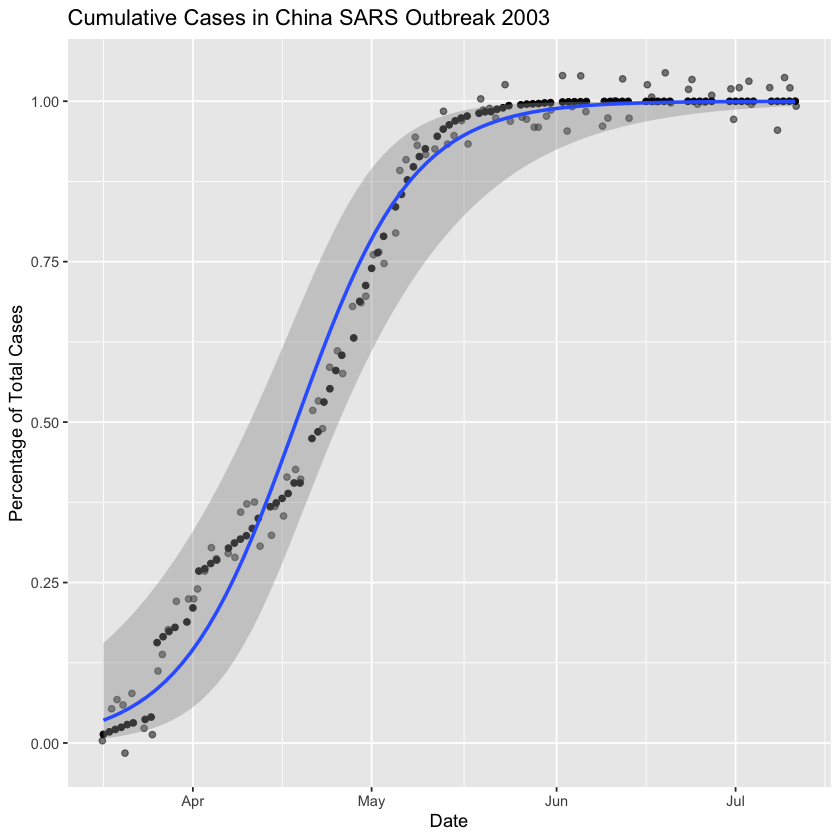

In [266]:
log_plot <- ggplot(data = dfSC, aes(x = Date, y = China/7084)) + 
geom_jitter(alpha = 0.5, height = 0.05) +  geom_point() + 
            stat_smooth(method = "glm", method.args = list(family = "binomial"), se = TRUE) + 
            ylab("Percentage of Total Cases")
log_plot + ggtitle("Cumulative Cases in China SARS Outbreak 2003")


In [271]:
log_reg <- glm(China/7084 ~ seq(1,96,1), data = dfSC, family = binomial)

log_reg

Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”



Call:  glm(formula = China/7084 ~ seq(1, 96, 1), family = binomial, 
    data = dfSC)

Coefficients:
  (Intercept)  seq(1, 96, 1)  
      -3.4763         0.1197  

Degrees of Freedom: 95 Total (i.e. Null);  94 Residual
Null Deviance:	    66.84 
Residual Deviance: 1.522 	AIC: 32.36

In [140]:
library(stats)

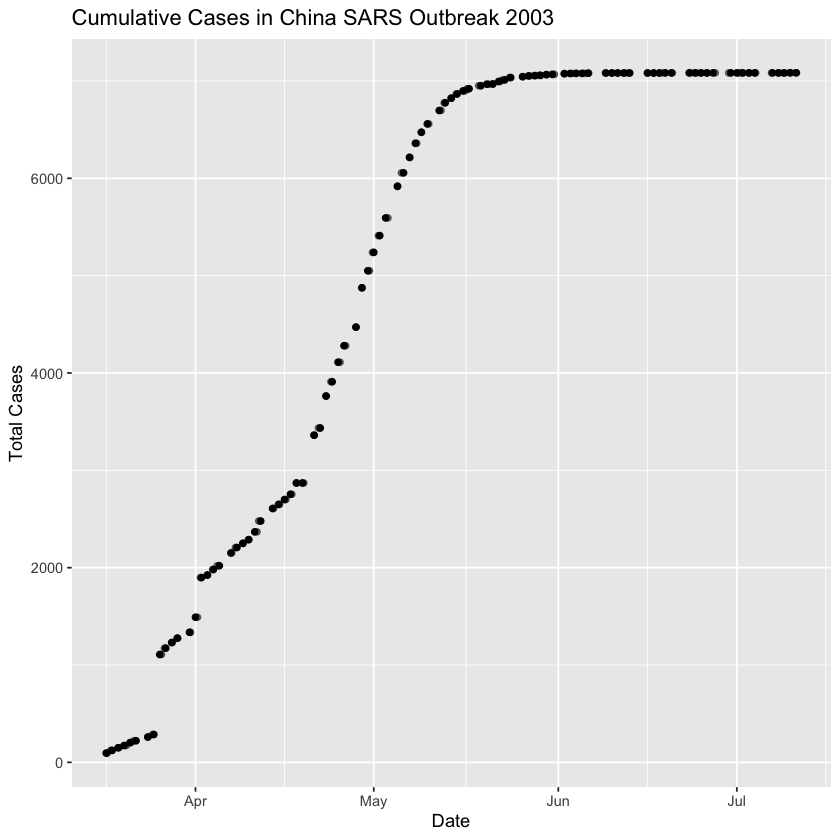

In [277]:
log_plot <- ggplot(data = dfSC, aes(x = Date, y = China)) + 
geom_jitter(alpha = 0.5, height = 0.05) +  geom_point() + 
            ylab("Total Cases")
log_plot + ggtitle("Cumulative Cases in China SARS Outbreak 2003")

In [235]:
#find the parameters for the equation
times <- seq(1,96,1)
SS<-getInitial(dfSC$China~SSlogis(times,alpha,xmid,scale),data=data.frame(dfSC$China==dfSC$China,times=times))
SS

alpha        xmid       scale 
7234.622282   30.381557    9.725367

In [313]:
K_0<-SS["alpha"]
R_0<-1/SS["scale"]
N0<-SS["alpha"]/(exp(SS["xmid"]/SS["scale"])+1)
y <- dfSC$China

m<-nls(y~K*N0*exp(R*times)/(K+N0*(exp(R*times)-1)),start=list(K=K_0,R=R_0,N0=N0))
#estimated parameters
summary(m)

c <- cor(y,predict(m))
cat("correlation coefficient: ", c)


Formula: y ~ K * N0 * exp(R * times)/(K + N0 * (exp(R * times) - 1))

Parameters:
          Estimate Std. Error t value Pr(>|t|)    
K.alpha  7.235e+03  4.944e+01  146.34   <2e-16 ***
R.scale  1.028e-01  3.240e-03   31.73   <2e-16 ***
N0.alpha 3.048e+02  2.847e+01   10.71   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 273.3 on 93 degrees of freedom

Number of iterations to convergence: 0 
Achieved convergence tolerance: 1.42e-06


correlation coefficient:  0.9942102

integer(0)

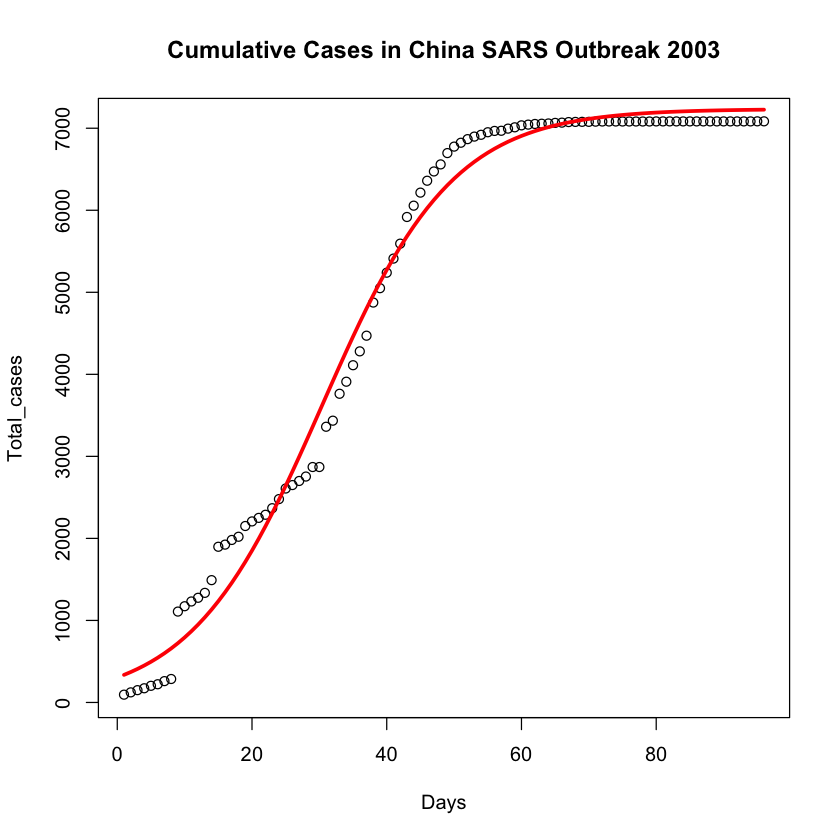

In [331]:
Days = times
Total_cases = dfSC$China

plot(Days, Total_cases) + lines(times,predict(m),col="red", lty=1,lwd=3)
title(main = "Cumulative Cases in China SARS Outbreak 2003")